In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### reading data 

In [3]:
gd = pd.read_csv('googleplaystore.csv') #GD = google data.
gd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
gd.shape

(10841, 13)

In [5]:
gd.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


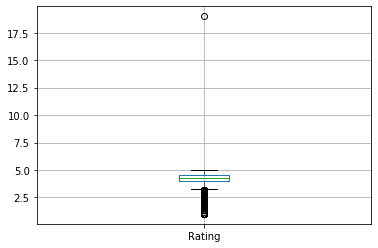

In [6]:
gd.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027373F427C8>]],
      dtype=object)

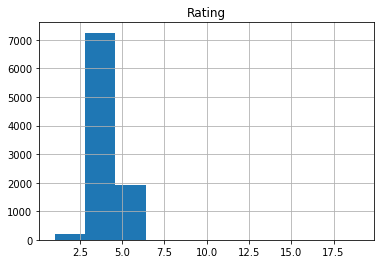

In [7]:
gd.hist()

In [8]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
gd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### check how many outliers

In [12]:
gd[gd.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
gd.drop([10472],inplace=True)

In [14]:
gd[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


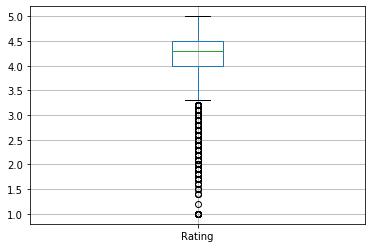

In [15]:
gd.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027374161FC8>]],
      dtype=object)

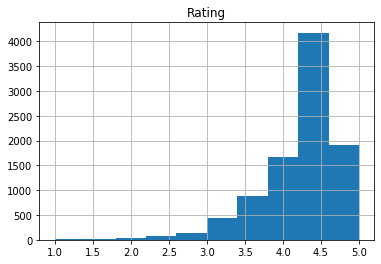

In [16]:
gd.hist()# for skewed data, a midian is more appropriate for filling missing values that a mean. 

### Remove columns that are 90% empty(standard precedure/common practice)

In [17]:
threshhold = len(gd)*0.1 # 10%
threshhold

1084.0

In [18]:
gd.dropna(thresh=threshhold, axis=1, inplace=True)

In [19]:
gd.isnull().sum() # no change as ther is no columns with less than or equal to 10% rows.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [20]:
gd.shape


(10840, 13)

### Data Imputaion and Manipulation

##### Filling the missing values appropriately

In [21]:
#Define a function, impute_median
def impute_median(series):
    return series.fillna(series.median())

In [24]:
gd.Rating = gd['Rating'].transform(impute_median)

In [25]:
#see the null values
gd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [29]:
#view modes per column with missing values
print(gd['Type'].mode())
print(gd['Current Ver'].mode())
gd['Android Ver'].mode()

0    Free
dtype: object
0    Varies with device
dtype: object


0    4.1 and up
dtype: object

In [30]:
#fill the missing categorical values with the mode
gd['Type'].fillna(str(gd['Type'].mode().values[0]), inplace=True)
gd['Current Ver'].fillna(str(gd['Current Ver'].mode().values[0]), inplace=True)
gd['Android Ver'].fillna(str(gd['Android Ver'].mode().values[0]), inplace=True)

In [31]:
gd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
gd.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [33]:
# Lets convert Price, Reviews and ratings into Numerical values
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd['Reviews'] = pd.to_numeric(gd['Reviews'], errors='coerce')

In [34]:
gd['Installs'] = gd['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
gd['Installs'] = gd['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
gd['Installs'] = gd['Installs'].apply(lambda x: float(x))

In [35]:
gd.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [44]:
sorted(gd['Android Ver'].unique())

['1.0 and up',
 '1.5 and up',
 '1.6 and up',
 '2.0 and up',
 '2.0.1 and up',
 '2.1 and up',
 '2.2 - 7.1.1',
 '2.2 and up',
 '2.3 and up',
 '2.3.3 and up',
 '3.0 and up',
 '3.1 and up',
 '3.2 and up',
 '4.0 and up',
 '4.0.3 - 7.1.1',
 '4.0.3 and up',
 '4.1 - 7.1.1',
 '4.1 and up',
 '4.2 and up',
 '4.3 and up',
 '4.4 and up',
 '4.4W and up',
 '5.0 - 6.0',
 '5.0 - 7.1.1',
 '5.0 - 8.0',
 '5.0 and up',
 '5.1 and up',
 '6.0 and up',
 '7.0 - 7.1.1',
 '7.0 and up',
 '7.1 and up',
 '8.0 and up',
 'Varies with device']

In [45]:
gd.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#### Data Visualisation

In [46]:
group = gd.groupby('Category')
x = group['Rating'].agg(np.mean)
y = group['Price'].agg(np.sum)
z = group['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

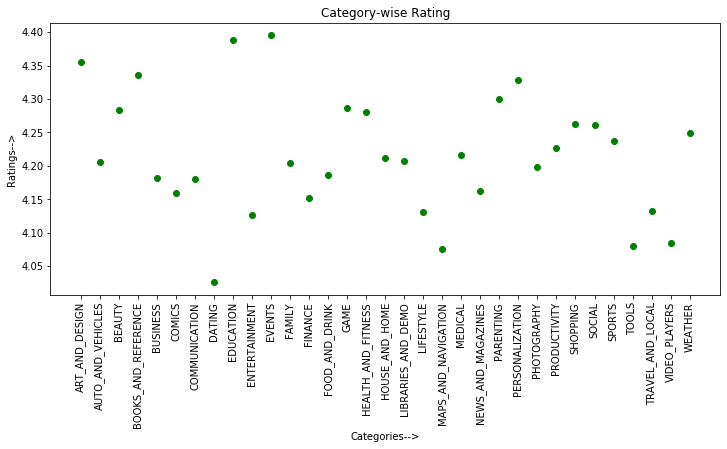

In [64]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro', color='g') # 'ro' means with respect to bubbles, default color is red
plt.xticks(rotation=90)
plt.title('Category-wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Ratings-->')
plt.show()

In [1]:
plt.figure(figsize=(12,5))
plt.plot(y, 'r--', color='g') # 'r--' means dashed line. for shape, "g^" for triangiular shape
plt.xticks(rotation=90)
plt.title('Category-wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

NameError: name 'plt' is not defined

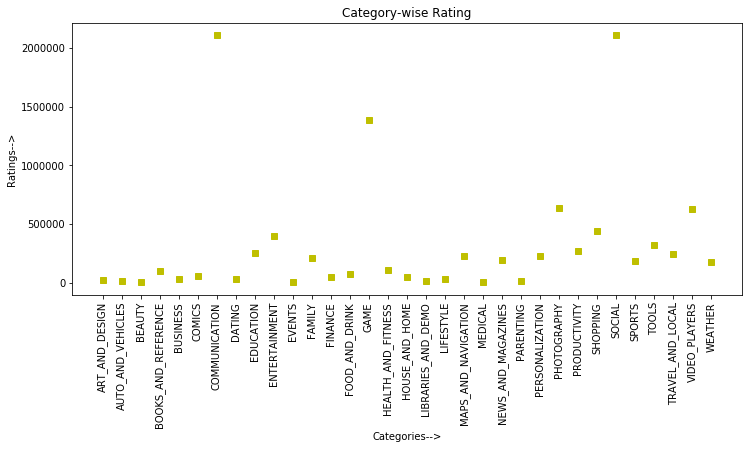

In [66]:
plt.figure(figsize=(12,5))
plt.plot(z, 'bs', color='y') # 'bs' means with respect to square boxes, default color is red
plt.xticks(rotation=90)
plt.title('Category-wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

## Thank you 